In [ ]:
%matplotlib inline

In [ ]:
#Retrieve CityScapes Dataset for both ID = 3 (Raw Images (Features)) and ID = 1 (Labels (Pixel annotations))
!wget --keep-session-cookies --save-cookies=cookies.txt --post-data 'username=mad51&password=Criticalmonkeys1&submit=Login' https://www.cityscapes-dataset.com/login/
!wget --load-cookies cookies.txt --content-disposition https://www.cityscapes-dataset.com/file-handling/?packageID=3
!wget --load-cookies cookies.txt --content-disposition https://www.cityscapes-dataset.com/file-handling/?packageID=1

--2021-11-17 16:38:32--  https://www.cityscapes-dataset.com/login/
Resolving www.cityscapes-dataset.com (www.cityscapes-dataset.com)... 139.19.217.8
Connecting to www.cityscapes-dataset.com (www.cityscapes-dataset.com)|139.19.217.8|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.cityscapes-dataset.com/downloads/ [following]
--2021-11-17 16:38:33--  https://www.cityscapes-dataset.com/downloads/
Reusing existing connection to www.cityscapes-dataset.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘index.html’

index.html              [ <=>                ]  47.36K   290KB/s    in 0.2s    

2021-11-17 16:38:34 (290 KB/s) - ‘index.html’ saved [48495]

--2021-11-17 16:38:34--  https://www.cityscapes-dataset.com/file-handling/?packageID=3
Resolving www.cityscapes-dataset.com (www.cityscapes-dataset.com)... 139.19.217.8
Connecting to www.cityscapes-dataset.com (www.cityscapes-dataset.com)|139.19.217.8

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Install gluoncv to handle loading the data and resizing it
!pip install mxnet
!pip install gluoncv

     |████████████████████████████████| 46.9 MB 84 kB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
     |████████████████████████████████| 1.3 MB 10.0 MB/s 


In [ ]:
#Run extractor
%cd /content/drive/MyDrive/
!python cityscapes.py

/content/drive/MyDrive
/usr/local/lib/python3.7/dist-packages/gluoncv/__init__.py:40: UserWarning: Both `mxnet==1.8.0` and `torch==1.10.0+cu111` are installed. You might encounter increased GPU memory footprint if both framework are used at the same time.
  warnings.warn(f'Both `mxnet=={mx.__version__}` and `torch=={torch.__version__}` are installed. '
Extracted gtFine_trainvaltest.zip
Extracted leftImg8bit_trainvaltest.zip


## How to load the dataset

Loading images and labels from Cityscapes is straight-forward
with GluonCV's dataset utility:



In [ ]:
#load the dataset for training and testing
from gluoncv.data import CitySegmentation
train_dataset = CitySegmentation(split='train')
test_dataset = CitySegmentation(split='val')
print('Training images:', len(train_dataset))
print('Test images:', len(test_dataset))

/usr/local/lib/python3.7/dist-packages/gluoncv/__init__.py:40: UserWarning: Both `mxnet==1.8.0` and `torch==1.10.0+cu111` are installed. You might encounter increased GPU memory footprint if both framework are used at the same time.
  warnings.warn(f'Both `mxnet=={mx.__version__}` and `torch=={torch.__version__}` are installed. '


Found 2975 images in the folder /root/.mxnet/datasets/citys/leftImg8bit/train
Found 500 images in the folder /root/.mxnet/datasets/citys/leftImg8bit/val
Training images: 2975
Test images: 500


## Get the first sample




In [ ]:
import numpy as np
img, mask = test_dataset[2]
# get pallete for the mask
from gluoncv.utils.viz import get_color_pallete
mask = get_color_pallete(mask.asnumpy(), dataset='citys')
mask.save('mask.png')

## Visualize data and label




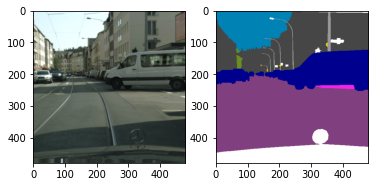

In [ ]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
# subplot 1 for img
fig = plt.figure()
fig.add_subplot(1,2,1)
plt.imshow(img.asnumpy().astype('uint8'))
# subplot 2 for the mask
mmask = mpimg.imread('mask.png')
fig.add_subplot(1,2,2)
plt.imshow(mmask)
# display
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  


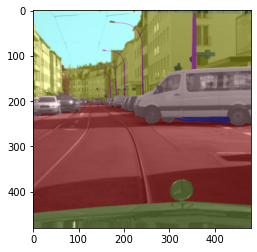

In [ ]:
from skimage import color
result_image = color.label2rgb(np.asarray(mask), img.asnumpy().astype('uint8'))
plt.imshow(result_image)

In [ ]:
#plt.imshow(img.asnumpy().astype('uint8'))
X_train = []
y_train = []

for i in range(len(train_dataset)):
  X_train.append(train_dataset[i][0].asnumpy())
  y_train.append(train_dataset[i][1].asnumpy())

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

In [ ]:
X_test = []
y_test = []
for i in range(len(test_dataset)):
  X_test.append(test_dataset[i][0].asnumpy())
  y_test.append(test_dataset[i][1].asnumpy())

X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

In [ ]:
import numpy as np
img = X_test[0]
# get pallete for the mask
from gluoncv.utils.viz import get_color_pallete
mask = get_color_pallete(y_test[0], dataset='citys')

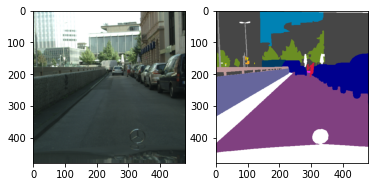

In [ ]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
# subplot 1 for img
fig = plt.figure()
fig.add_subplot(1,2,1)
plt.imshow(img.astype('uint8'))
# subplot 2 for the mask
fig.add_subplot(1,2,2)
plt.imshow(mask)
# display
plt.show()

In [ ]:
import torch

In [ ]:
X_test_tensor = torch.from_numpy(X_test)
y_test_tensor = torch.from_numpy(y_test)
X_train_tensor = torch.from_numpy(X_train)
y_train_tensor = torch.from_numpy(y_train)

In [ ]:
#Save the data for later use
torch.save(X_train_tensor, 'X_train.pt')
torch.save(y_train_tensor, 'y_train.pt')
torch.save(X_test_tensor, 'X_test.pt')
torch.save(y_test_tensor, 'y_test.pt')

In [ ]:
import torch
import torchvision
import cv2

from PIL import Image

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = torchvision.models.segmentation.deeplabv3_resnet101(pretrained=False, num_classes=)